# Initialized data into dataframe to later manipulate 

In [1]:
import pandas as pd

# make sure you imported the kaggle dataset and have it on the same directory as this. 
file = "wiki_movie_plots_deduped.csv"

dataFrame = pd.read_csv(file) #like 2d array 


# Some Debug Functions (to filter and mess with data)

In [2]:
def displayFromDataFrame(frame, numValues, keyF):
    """using pandas dataframe object created from a csv file, look at each movie/thing (by row)
        by key param it will print the first n values in the dataframe 
        use: to better understand pandas 
    """
    for index, row in frame.iterrows():   #frame is a pandas dataframe of a csv file framX["ColumnName"][index] 
        if index >= numValues:
            break
        value = row[keyF]
        print(value)
"""
rows genre txt
0     x     ....
"""

def remove_nested_brackets(text):
    # Regular expression to match and remove content within nested square brackets
    square_brackets_pattern = r'\[[^\[\]]*\]'
    
    # Regular expression to match and remove content within nested angle brackets
    angle_brackets_pattern = r'<[^<>]*>'
    
    # Define a function to recursively remove nested brackets
    def remove_nested(text):
        # Remove content within square brackets
        text_without_square_brackets = re.sub(square_brackets_pattern, '', text)
        # Remove content within angle brackets
        text_without_angle_brackets = re.sub(angle_brackets_pattern, '', text_without_square_brackets)
        
        # Check if there are any nested brackets left
        if re.search(square_brackets_pattern, text_without_angle_brackets) or re.search(angle_brackets_pattern, text_without_angle_brackets):
            # If nested brackets are found, recursively remove them
            return remove_nested(text_without_angle_brackets)
        else:
            # If no more nested brackets are found, return the modified text
            return text_without_angle_brackets

    # Call the recursive function
    result = remove_nested(text)
    return result


print("functions initialized")

functions initialized


# Gather the movies into the genrePlot dictionary 

In [3]:
# Gather the ,movies into the genrePlot dictionary 

selected_col = dataFrame[["Genre", "Plot"]] # columns from the csv that we want to focus on

selected_genres = ["comedy", "drama", "adventure", "fantasy", 
                  "horror", "mystery", "romance", 
                 "action", "thriller", "western"] # select 10 genres

#dict
genre_plot = {}

#iter through rows (movie) in data frame 
for index, row in selected_col.iterrows():
    curGenre = row['Genre']
    curPlot = row['Plot']
    
    if curGenre not in selected_genres:     
        #skip over this movie if it's genre is not one we're looking for 
        continue    
    if curGenre not in genre_plot:          
        #if cur movies genre hasn't been added to dict yet -> add that genre title with that plot as it's value
        genre_plot[curGenre] = [curPlot]
    elif len(genre_plot[curGenre]) < 250:
        #since this genre is in the dict -> now make sure that genre key hasn't surpassed having 250 entries 
        genre_plot[curGenre].append(curPlot)
            

# LLX CODE FOR PROJECT:

## Goal: Create unigrams for the 10 different genres 
- create word clouds with this 
- 

In [68]:
import nltk, re, glob
from nltk.corpus import stopwords 

#generate and print frequency for words in a UNIGRAM for genre topic (TAKES TOKEN AS INPUT):
def printUnigramData(curGenre, tokens, n, printBool):
    #param: already a freq dist 
    #n: top 10 or more values to print out
    #return: a list of the top values 
    unigram = nltk.ngrams(tokens, 1)
    unigramL = list(unigram)
    unigramFreq = nltk.FreqDist(unigramL)
    if printBool:
        print("Genre:", curGenre, "(most frequently occuring words found)")
    popularWords = []
    popularUnigrams = unigramFreq.most_common(n)
    for unigramObj in popularUnigrams:
        unigram = unigramObj[0]
        if printBool:
            print(unigram[0]) #, unigramObj[1]) #name of word and freq of word 
        popularWords.append(unigram[0])
    if printBool:
        print()
    return popularWords

stopList = stopwords.words('english')
stopList.extend([")", "(", ".", ",", "?", "could", "would", "“", "”", "’", ";", "!","much", "like", "one", "many", "though", "without", "upon"])
stopList.extend(["''", "``", "'s", 'get', 'also'])

#iterate through each large genre list -> textChunk -> tokens -> noStopTokens -> unigram -> freq object 
genreUnigrams = {}
for curGenre in selected_genres:
    plotsList = genre_plot[curGenre]
    genresTexts = " ".join(plotsList) #now text chunk
    #remove spacing
    genresTexts = re.sub(r'[\n|\s]+', ' ', genresTexts)
    genresTexts = remove_nested_brackets(genresTexts)
    #tokenize
    tokens = nltk.word_tokenize(genresTexts)
    #remove stop words 
    noStop_tokens = [w for w in tokens if w.lower() not in stopList]
    #unigram the genre 
    #iterate through top ten object to display unigram findings 
        #topTen = unigramFreq.most_common(10) #took off and now in funct 
    popularWords = printUnigramData(curGenre, noStop_tokens, 10, True) #CREATES AND PRINTS TOP 10 
    #print(noStop_tokens)
    genreUnigrams[curGenre] = [noStop_tokens, popularWords]

#genreUnigrams dict: GENRE{ filtered tokens , popular words }

#comedy, drama, adventure, fantasy, horror, mystery, romance,action, thriller, western

Genre: comedy (most frequently occuring words found)
man
woman
two
young
back
girl
love
Harold
Charlie
wife

Genre: drama (most frequently occuring words found)
love
father
film
John
man
wife
home
goes
son
tells

Genre: adventure (most frequently occuring words found)
ship
men
back
two
love
Jim
King
island
father
find

Genre: fantasy (most frequently occuring words found)
back
father
tells
two
home
time
find
life
finds
Harry

Genre: horror (most frequently occuring words found)
Dr.
house
death
tells
night
body
finds
man
back
room

Genre: mystery (most frequently occuring words found)
police
Holmes
finds
murder
man
Chan
tells
Tom
killed
dead

Genre: romance (most frequently occuring words found)
love
father
tells
life
home
back
time
two
goes
day

Genre: action (most frequently occuring words found)
police
killed
men
two
gang
kill
car
back
find
help

Genre: thriller (most frequently occuring words found)
police
tells
car
house
man
back
home
two
killed
finds

Genre: western (most frequent

## Frequency (filtered) Remove Generics like names and other people nouns
- source: https://gist.github.com/sebleier/554280 
- txt file with stop list should be included in rep 

In [70]:
with open("extensiveStopList.txt", "r", encoding='utf=8') as fileO:
    fullText = fileO.read()
filterStop = fullText.split(",")
if len(filterStop) == 1160:
    print("Success: created extensiveStopList variable")

Success: created extensiveStopList variable


In [71]:
print(len(filterStop))
filterStop.extend([w for w in stopList if w not in filterStop])
print(len(filterStop))
#get out characters...
filterStop.extend(["man", "woman", "jim", "john", "jack", "harry", "chan", "tom", "father", "mother", "son", "daughter", "tells", "gene", "keaton", "harold", "charlie", "husband", "wife", "girl", "buster", "mrs.", "men", "Dr.", "paul", "billy", "martin", "david", "kate", "george", "joe", "alice"])

1160
1173


In [72]:
#iterate through each large genre list -> textChunk -> tokens -> noStopTokens -> unigram -> freq object 
genreUnigrams = {}
for curGenre in selected_genres:
    plotsList = genre_plot[curGenre]
    genresTexts = " ".join(plotsList) #now text chunk
    #remove spacing
    genresTexts = re.sub(r'[\n|\s]+', ' ', genresTexts)
    genresTexts = remove_nested_brackets(genresTexts)
    #tokenize
    tokens = nltk.word_tokenize(genresTexts)
    #remove stop words 
    noStop_tokens = [w for w in tokens if w.lower() not in filterStop]
    #unigram the genre 
    #iterate through top ten object to display unigram findings 
        #topTen = unigramFreq.most_common(10) #took off and now in funct 
    popularWords = printUnigramData(curGenre, noStop_tokens, 10, False) #CREATES AND PRINTS TOP 10 
    #print(noStop_tokens)
    genreUnigrams[curGenre] = [noStop_tokens, popularWords]
print("Done")

Done


## Word Cloud  

comedy
['young', 'love', 'house', 'money', 'takes', 'film', 'marry', 'time', 'finds', 'returns']


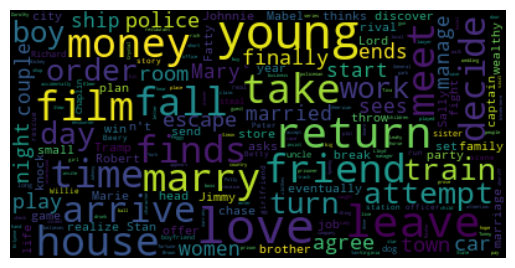

mystery
['police', 'Holmes', 'finds', 'murder', 'killed', 'dead', 'house', 'death', 'room', 'car']


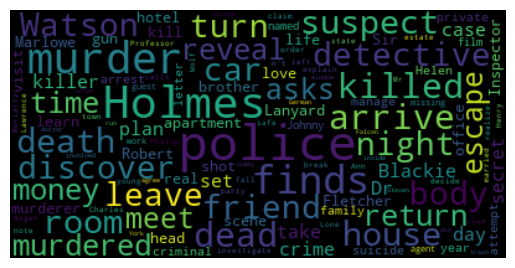

thriller
['police', 'car', 'house', 'killed', 'finds', 'kill', 'death', 'apartment', 'takes', 'murder']


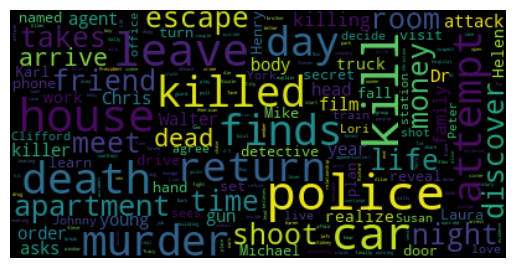

In [73]:
#Wordcloud
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

def createCloud(tokens_as_string):
    wordcloud = WordCloud(max_font_size=40, collocations=False).generate(tokens_as_string)
    plt.figure
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

"""comedyTokens = genreUnigrams["comedy"][0]
comedyTxt = " ".join(comedyTokens)
createCloud(comedyTxt)
print("comedy")
print(genreUnigrams["comedy"][1])

romanceTokens = genreUnigrams["romance"][0]
romanceTxt = " ".join(romanceTokens)
createCloud(romanceTxt)
print("romance")
print(genreUnigrams["mystery"][1])
"""

#using genreUnigrams obj in function
def displayGenreInfo(genre):
    print(genre)
    print(genreUnigrams[genre][1])
    genreTokens = genreUnigrams[genre][0]
    genreTxt = " ".join(genreTokens)
    createCloud(genreTxt)

#redundant???
def compareTwo(*argv):
    for arg in argv:
        displayGenreInfo(arg)

compareTwo("comedy", "mystery", "thriller")

#0: tokens | 1: popular words calculated earlier 
#comedy, drama, adventure, fantasy, horror, mystery, romance,action, thriller, western

In [ ]:
#create a more official representation of data 





# Debug Explain code variables

In [28]:
#selected_col is a dictionary array, using Genre -> a value in it can be found 
#print(selected_col["Genre"])

displayFromDataFrame(dataFrame, 20, "Title")


Kansas Saloon Smashers
Love by the Light of the Moon
The Martyred Presidents
Terrible Teddy, the Grizzly King
Jack and the Beanstalk
Alice in Wonderland
The Great Train Robbery
The Suburbanite
The Little Train Robbery
The Night Before Christmas
Dream of a Rarebit Fiend
From Leadville to Aspen: A Hold-Up in the Rockies
Kathleen Mavourneen
Daniel Boone
How Brown Saw the Baseball Game
Laughing Gas
The Adventures of Dollie
The Black Viper
A Calamitous Elopement
The Call of the Wild


# My tests
- using dataframe object 
- to filter columns into smaller dataframe object: `smaller = df[ ["col1"],["col2"] ]`

## goal: create folder with 10 subfolders for the genres inputted
    - minor/not important

In [37]:
#goal: create folder with 10 subfolders for the genres inputted
  #sidenote: not important 

popularGenres = ["comedy", "drama", "adventure", "fantasy", 
                  "horror", "mystery", "romance", 
                 "action", "thriller", "western"] # select 10 genres

print("This block will create the paths for these top genres")
print("Popular Genres:")
print(popularGenres)

try:
    os.mkdir("popularGenres")
except OSError as error:
    os.remove
    print(error)
    



This block will create the paths for these top genres
Popular Genres:
['comedy', 'drama', 'adventure', 'fantasy', 'horror', 'mystery', 'romance', 'action', 'thriller', 'western']


## goal: tokenize all genres in csv

In [74]:
#create genresL which has all genres listed 
import nltk, re, glob
from nltk.corpus import stopwords

genresL = []

for index, row in dataFrame.iterrows():
    curGenre = row["Genre"]
    genresL.append(curGenre)
genresTxt = "\n\n".join(genresL)

with open("allGenres.txt", "w", newline="") as fileO:
    fileO.write(genresTxt)
print("done")

done


In [68]:
##tokenize genresTxt and remove stop words 

##create stopwords 
stopList = stopwords.words('english')
stopList.extend([",","/"])
stopList.append("unknown")

##tokenize 
genreTokenL = nltk.word_tokenize(genresTxt)

##remove stop words from token page 
no_stop_genre_tokens = [w for w in genreTokenL if w.lower() not in stopList]

##show frequency of tokens 
genreLUnigram = nltk.ngrams(no_stop_genre_tokens, 1)
genreUnigramList = list(genreLUnigram)
unigramFreq = nltk.FreqDist(genreUnigramList)

topTen = unigramFreq.most_common(20)

"""for unigramObj in topTen:
    unigram = unigramObj[0] #get a tuple like list of the makeup of unigram (one val)
    print(unigram[0])
"""
print(unigramFreq["drama"])

#test: inverse of most common -> least common 
n = 20
lastTwenty = unigramFreq.most_common()[:-n-1:-1]
for unigramObj in lastTwenty:
    unigram = unigramObj[0]
    print(unigram[0])


0
production
glukoza
sukachenko
oleg
krapiventsev
sergey
khokhlova
olga
volleyball
harem
supeheroes
karuta
poker
cyberpunk
dystopia
gore
koyuki
maysuyama
ken'ichi
house


## ignore: Directory stuff 

In [36]:
#test: remove directory 

import os 
import shutil

try: 
    shutil.rmtree("useless")
    print("folder: 'useless' was removed from cwd")
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

print("done")

folder: 'useless' was removed from cwd
done


## goal: Print parts of data (for slides) 

printing out amount of movies in each genre 

In [42]:
total = 0
for genreO in genre_plot:
    genreL = genre_plot[genreO]
    print(genreO, len(genreL))
    total += len(genreL)
print(total)

western 250
comedy 250
drama 250
adventure 250
horror 250
fantasy 204
mystery 250
romance 250
thriller 250
action 250
2454


In [ ]:
print(len(genre_plot["comedy"]))

print out in a line a csv row of data 
- using: dataFrame obj 
    - to call: `dataframe["Column"][Index]`

In [47]:
#prints the coloumns in csv
#print(dataFrame)
movieRow = ""
for column in dataFrame:
    print(column)

Release Year
Title
Origin/Ethnicity
Director
Cast
Genre
Wiki Page
Plot


In [48]:
movieRow = ""
for index,row in dataFrame.iterrows():
    print(row.iloc[0])
    break

1901


In [49]:

#to print movie/row info -> dataframe.iloc[0]
    #and index aka movie index in csv 
print(dataFrame.iloc[0])

Release Year                                                     1901
Title                                          Kansas Saloon Smashers
Origin/Ethnicity                                             American
Director                                                      Unknown
Cast                                                              NaN
Genre                                                         unknown
Wiki Page           https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...
Plot                A bartender is working at a saloon, serving dr...
Name: 0, dtype: object


## goal: test word2vec
- note: might need to install gensim first.. 
- download and place this file in dir: [google news vector](https://github.com/eyaler/word2vec-slim/blob/master/GoogleNews-vectors-negative300-SLIM.bin.gz) 

### download zip ONLY IF NEEDED STILL (fresh git clone from rep)

In [ ]:
#download the file.. (doesn't fit into rep)
from urllib.request import urlretrieve
url = (
     "https://github.com/eyaler/word2vec-slim/raw/master/GoogleNews-vectors-negative300-SLIM.bin.gz?download=")
filename = "GoogleNews-vectors-negative300-SLIM.bin.gz"
urlretrieve(url,filename)

### importing model and ini funciton to make graph 

In [76]:
import gensim
from gensim.models import Word2Vec

bigmodel = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin.gz", binary=True)
print("Google News Model Loaded!")


Google News Model Loaded!


In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from gensim.models import Word2Vec

#bigmodel -> google news model downloaded earlier 

def createWordVecGraph(wordpairs):
    # Go get the word vectors for these words and 
    # then store them so you can use them later on.
    vecwords = []  # stores the words above
    vecs = []      # stores the vectors for each word
    for k,v in wordpairs.items():
        kvec = bigmodel[k]
        vvec = bigmodel[v]
        vecs.append(kvec)
        vecwords.append(k)
        vecs.append(vvec)
        vecwords.append(v)


    # PCA is a way to project multiple dimensions down to 
    # fewer dimensions, which we are doing here so we can 
    # visualize the word vectors.
    pca = PCA(n_components=2, whiten=True)
    vectors2d = pca.fit(vecs).transform(vecs) 


    # This is just some ugly matplotlib code for plotting
    # the 2-D vectors and visualizing them with different colors.
    i = 2
    for point, word in zip(vectors2d, vecwords):
        if i%2 == 0:
            plt.scatter(point[0], point[1], c='r')
        else:
            plt.scatter(point[0], point[1], c='b')
        i += 1

        plt.annotate(
                word, 
                xy=(point[0], point[1]),
                xytext=(7, 6),
                textcoords='offset points',
                ha='left' ,
                va='top',
                size="medium"
                )
print("word2vec graph function initialized!")

word2vec graph function initialized!


### Assign Word Pairs Here: 
- then the function is called to make the graph

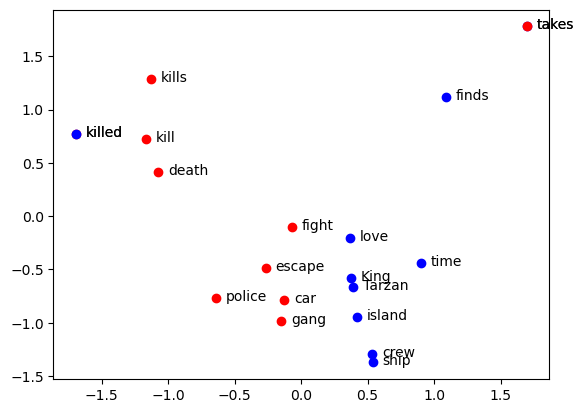

In [81]:
wordPairs = {"police":"ship",  "killed":"love",  "gang":"King",  "kill":"island",  "car":"crew",  "fight":"takes",  "escape":"Tarzan",  "death":"time",  "kills":"killed",  "takes":"finds"}

createWordVecGraph(wordPairs)


### Generate dictionary (manual)
- takes input from user to create plaintext in python dictionary format to set wordPairs var above

In [33]:
# take input and print out the key value thingie 

a1 = input()
a2 = input()

police killed gang kill car fight escape death kills takes
ship love King island crew takes Tarzan time killed finds


In [ ]:
# OR set a1 a2 here 


In [34]:
a1L = a1.split(" ")
a2L = a2.split(" ")

myPair = ''
for i in range(len(a1L)):
    myPair += '"' + a1L[i] + '"' + ":" + '"' + a2L[i] + '"' + ",  "
myPair = myPair[:-3]
print(myPair)


"police":"ship",  "killed":"love",  "gang":"King",  "kill":"island",  "car":"crew",  "fight":"takes",  "escape":"Tarzan",  "death":"time",  "kills":"killed",  "takes":"finds"
